In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [24]:
dataset_path = "/content/IMDB-Movie-Data.csv"
data = pd.read_csv(dataset_path)

In [25]:
data_indexed = pd.read_csv(dataset_path, index_col="Title")

In [26]:
data.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [28]:
# Extract data as series
genre = data["Genre"]
genre

,Genre
0,"Action,Adventure,Sci-Fi"
1,"Adventure,Mystery,Sci-Fi"
2,"Horror,Thriller"
3,"Animation,Comedy,Family"
4,"Action,Adventure,Fantasy"
...,...
995,"Crime,Drama,Mystery"
996,Horror
997,"Drama,Music,Romance"
998,"Adventure,Comedy"


In [29]:
# Extract data as dataframe
genre = data[["Genre"]]
genre

,Genre
0,"Action,Adventure,Sci-Fi"
1,"Adventure,Mystery,Sci-Fi"
2,"Horror,Thriller"
3,"Animation,Comedy,Family"
4,"Action,Adventure,Fantasy"
...,...
995,"Crime,Drama,Mystery"
996,Horror
997,"Drama,Music,Romance"
998,"Adventure,Comedy"


In [30]:
# Choose columns to make a new dataframe
some_cols = ["Title", "Genre", "Actors", "Director", "Rating"]
data[some_cols]

,Title,Genre,Actors,Director,Rating
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi","Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",James Gunn,8.1
1,Prometheus,"Adventure,Mystery,Sci-Fi","Noomi Rapace, Logan Marshall-Green, Michael Fa...",Ridley Scott,7.0
2,Split,"Horror,Thriller","James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",M. Night Shyamalan,7.3
3,Sing,"Animation,Comedy,Family","Matthew McConaughey,Reese Witherspoon, Seth Ma...",Christophe Lourdelet,7.2
4,Suicide Squad,"Action,Adventure,Fantasy","Will Smith, Jared Leto, Margot Robbie, Viola D...",David Ayer,6.2
...,...,...,...,...,...
995,Secret in Their Eyes,"Crime,Drama,Mystery","Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",Billy Ray,6.2
996,Hostel: Part II,Horror,"Lauren German, Heather Matarazzo, Bijou Philli...",Eli Roth,5.5
997,Step Up 2: The Streets,"Drama,Music,Romance","Robert Hoffman, Briana Evigan, Cassie Ventura,...",Jon M. Chu,6.2
998,Search Party,"Adventure,Comedy","Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",Scot Armstrong,5.6


In [31]:
# Slicing by iloc
data.iloc[10:15][["Title", "Rating", "Revenue (Millions)"]]

,Title,Rating,Revenue (Millions)
10,Fantastic Beasts and Where to Find Them,7.5,234.02
11,Hidden Figures,7.8,169.27
12,Rogue One,7.9,532.17
13,Moana,7.7,248.75
14,Colossal,6.4,2.87


In [32]:
# Data Slection - Based on Conditional filtering
data[((data["Year"] >= 2000) & (data["Year"] <= 2015))
        & (data["Rating"] < 6.0)
        & (data["Revenue (Millions)"] > data["Revenue (Millions)"].quantile(0.95))]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
941,942,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",As a string of mysterious killings grips Seatt...,David Slade,"Kristen Stewart, Robert Pattinson, Taylor Laut...",2010,124,4.9,192740,300.52,58.0


In [33]:
# Groupby operation
data.groupby("Director")[["Rating"]].mean().head()

,Rating
Director,
Aamir Khan,8.5
Abdellatif Kechiche,7.8
Adam Leon,6.5
Adam McKay,7.0
Adam Shankman,6.3


In [34]:
# Sorting Operation
data.groupby("Director")[["Rating"]].mean().sort_values(by="Rating", ascending=False).head()

,Rating
Director,
Nitesh Tiwari,8.80
Christopher Nolan,8.68
Olivier Nakache,8.60
Makoto Shinkai,8.60
Aamir Khan,8.50


In [35]:
# View missing values
# Check null values row-wise
data.isnull().sum()

,0
Rank,0
Title,0
Genre,0
Description,0
Director,0
Actors,0
Year,0
Runtime (Minutes),0
Rating,0
Votes,0


# Deal with missing values - Deleting

In [36]:
# Use drop function to drop colums
data.drop("Metascore", axis=1).head()


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions)
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02


# Deal with missing values = Filling

In [39]:
# Fill missing values with mean
revenue_mean = data["Revenue (Millions)"].mean()
print("The mean revenue is: ", revenue_mean)

data["Revenue (Millions)"].fillna(revenue_mean, inplace=True)

The mean revenue is:  82.95637614678898


In [40]:
# apply() function
# Clessify movies based on ratings
def rating_group(rating):
    if rating >= 7.5:
        return "Good"
    elif rating >= 6.0:
        return "Average"
    else:
        return "Bad"

data["Rating_category"] = data["Rating"].apply(rating_group)

data[["Title", "Director", "Rating", "Rating_category"]].head()

,Title,Director,Rating,Rating_category
0,Guardians of the Galaxy,James Gunn,8.1,Good
1,Prometheus,Ridley Scott,7.0,Average
2,Split,M. Night Shyamalan,7.3,Average
3,Sing,Christophe Lourdelet,7.2,Average
4,Suicide Squad,David Ayer,6.2,Average


# Data Analysis with Time Series data

In [41]:
dataset_path = "/content/opsd_germany_daily.csv"
opsd_daily = pd.read_csv(dataset_path)

print(opsd_daily.shape)
print(opsd_daily.dtypes)
opsd_daily.head()

(4383, 5)
Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [42]:
# Let "Date" column be the index
opsd_daily = opsd_daily.set_index("Date")
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [43]:
# Extract "Date" column to Year, Month, Weekday
# Parse the Date
opsd_daily = pd.read_csv(dataset_path, parse_dates=True, index_col=0)

opsd_daily["Year"] = opsd_daily.index.year
opsd_daily["Month"] = opsd_daily.index.month
opsd_daily["Weekday"] = opsd_daily.index.day_name()

In [44]:
# Display a random sampling of 5 rows
opsd_daily.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


In [45]:
# Time-based indexing
opsd_daily.loc["2014-01-20":"2014-01-22"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


In [47]:
opsd_daily.loc["2012-02"].head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,Thursday
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,Friday
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,Saturday
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,Sunday


# Visualizing time series data

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='Date'>

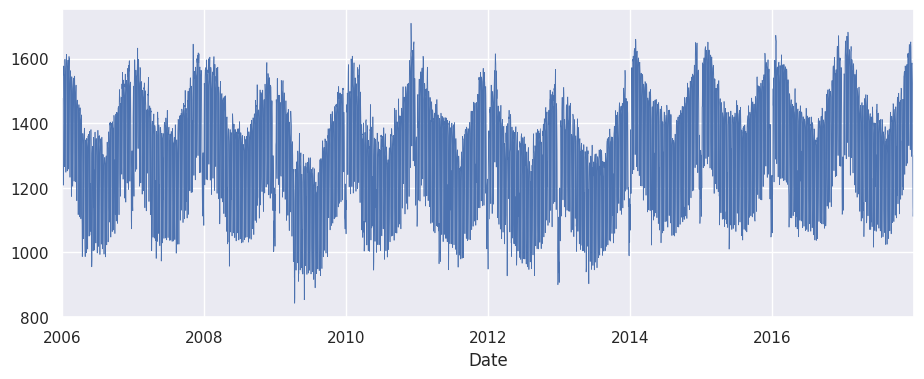

In [50]:
sns.set(rc={"figure.figsize": (11, 4)})
opsd_daily["Consumption"].plot(linewidth=0.5)

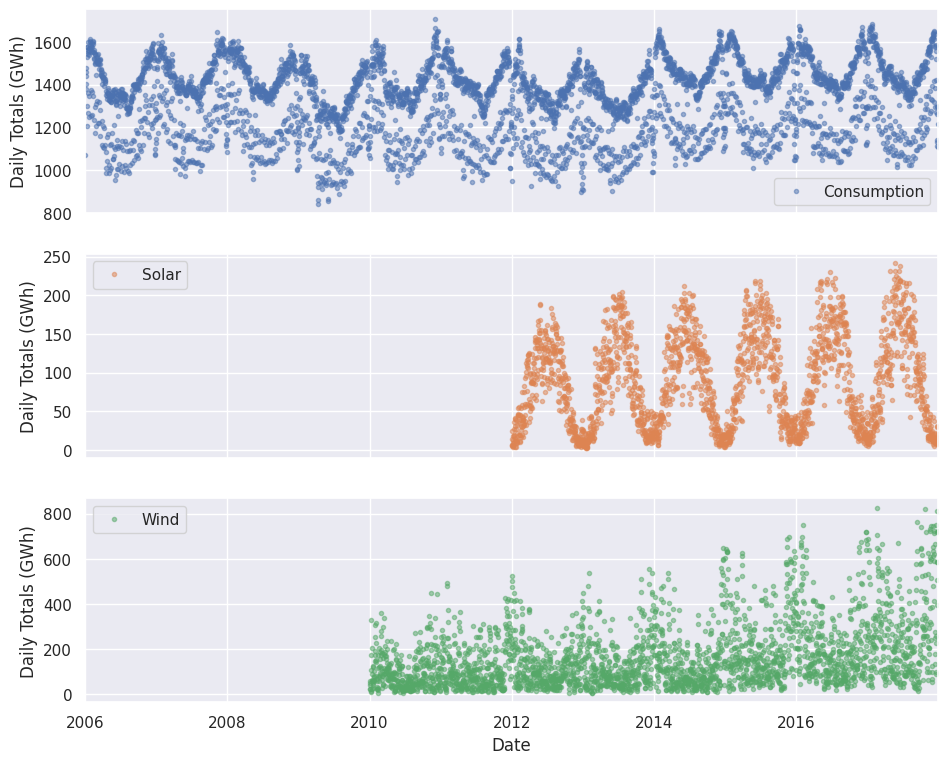

In [51]:
# Plot columns to seperate chart
cols_plot = ["Consumption", "Solar", "Wind"]
axes = opsd_daily[cols_plot].plot(marker=".", alpha=0.5, linestyle="None", figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel("Daily Totals (GWh)")
plt.show()

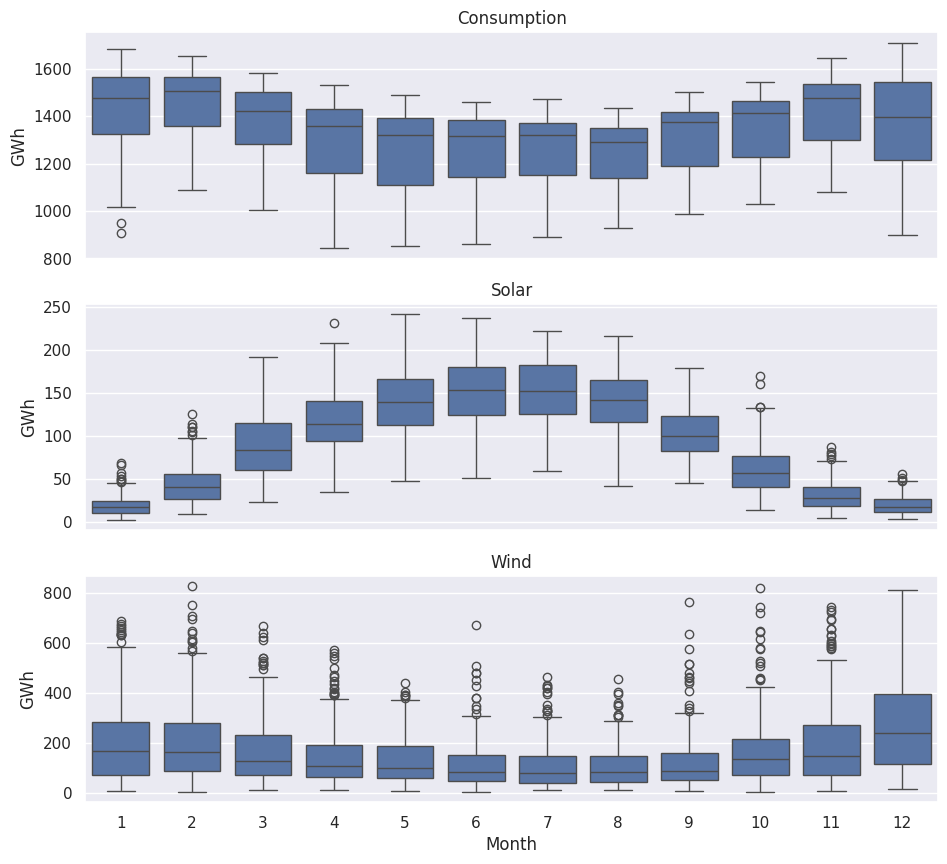

In [52]:
# Plot in season
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(["Consumption", "Solar", "Wind"], axes):
    sns.boxplot(data=opsd_daily, x="Month", y=name, ax=ax)
    ax.set_ylabel("GWh")
    ax.set_title(name)

    # Remove the automatic x-axis label from all but the bottoms subplot
    if ax != axes[-1]:
        ax.set_xlabel("")
plt.show()

In [53]:
# Frequencies:
pd.date_range("1998-03-10", "1998-03-15", freq="D")

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

In [54]:
# To select an arbitrary sequence of date / time values from a pandas time series,
# we need to use a DatetimeIndex, rather than simply a list of date / time strings
times_sample = pd.to_datetime(["2013-02-03", "2013-02-06", "2013-02-08"])

# Select the specified dates and just the Consumption column
consum_sample = opsd_daily.loc[times_sample, ["Consumption"]].copy()
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [55]:
# Convert the data to daily frequency , without filling any missings
consum_freq = consum_sample.asfreq("D")

# Create a column with missings forward filled
consum_freq["Consumption - Forward Fill"] = consum_sample.asfreq("D", method="ffill")
consum_freq

,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


In [58]:
# Resampling
data_column = ["Consumption", "Wind", "Solar", "Wind+Solar"]

# Resample to weekly frequency, aggregating with mean
opsd_weekly_mean = opsd_daily[data_column].resample("W").mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


In [60]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


# Vizualy Daily and Weekly time series of Solar in 6 months

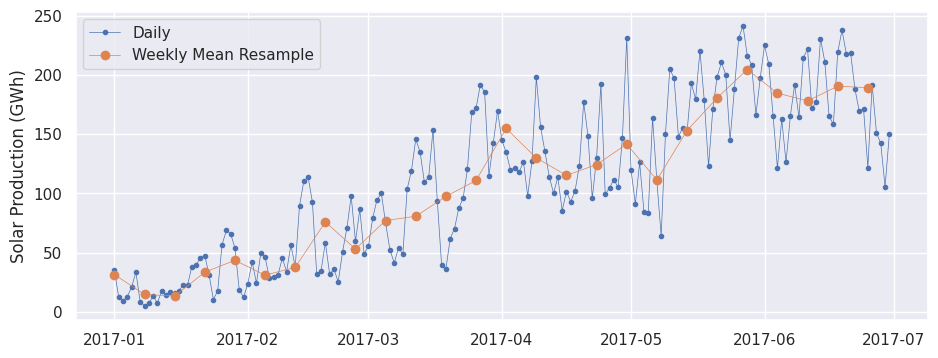

In [62]:
# Start and end date range to extract
start, end = "2017-01", "2017-06"

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, "Solar"], marker = ".", linestyle="-", linewidth="0.5", label="Daily")
ax.plot(opsd_weekly_mean.loc[start:end, "Solar"], marker = "o", linestyle="-", linewidth="0.5", label="Weekly Mean Resample")

ax.set_ylabel("Solar Production (GWh)")
ax.legend()
plt.show()

In [64]:
# Compute the annual sums, setting the value to NaN for any year which has
# fewer than 360 days of data
opsd_annual = opsd_daily[data_column].resample("Y").sum(min_count=360)

In [65]:
# The default index of the resampled DataFrame is the last day of each year ,
# ( ’2006 -12 -31 ’ , ’2007 -12 -31 ’ , etc .) so to make life easier , set the index
# to the year component
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = "Year"

# Compute the ratio of Wind+Solar to Consumption
opsd_annual["Wind+Solar/Consumption"] = opsd_annual["Wind+Solar"] / opsd_annual["Consumption"]
opsd_annual.tail()

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2013,463336.85300,47197.832,29559.780,76697.443,0.165533
2014,504164.82100,51107.672,32498.307,83370.502,0.165364
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


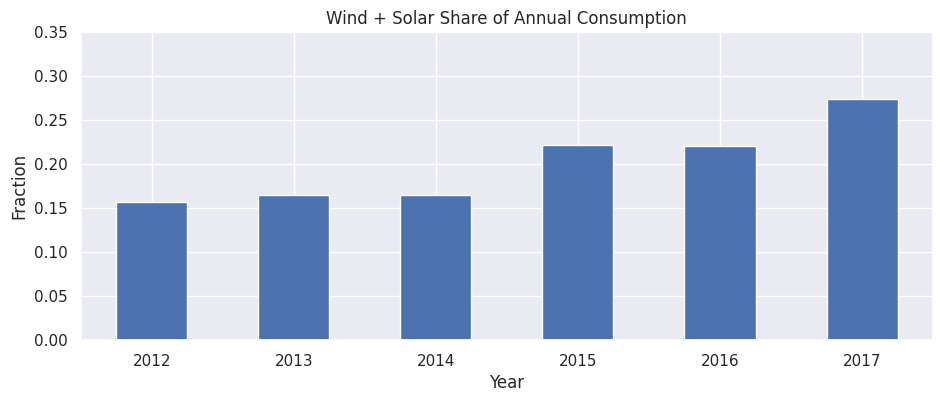

In [67]:
# Plot from 2012 onwards
ax = opsd_annual.loc[2012:, "Wind+Solar/Consumption"].plot.bar(color="C0")
ax.set_ylabel("Fraction")
ax.set_ylim(0, 0.35)
ax.set_title("Wind + Solar Share of Annual Consumption")
plt.xticks(rotation=0)
plt.show()

# Rolling window

In [68]:
# Compute the centered 7-day rolling mean
opsd_7d = opsd_daily[data_column].rolling(7, center=True).mean()
opsd_7d.head(10)


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


# Trend

In [69]:
import matplotlib.dates as mdates

In [70]:
# The min_periods =360 argument accounts for a few isolated missing days in the
# wind and solar production time series
opsd_365d = opsd_daily[data_column].rolling(window=365, center=True, min_periods=360).mean()
opsd_365d

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,NaN,NaN,NaN,NaN
2006-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,NaN,NaN,NaN,NaN
2017-12-28,NaN,NaN,NaN,NaN
2017-12-29,NaN,NaN,NaN,NaN


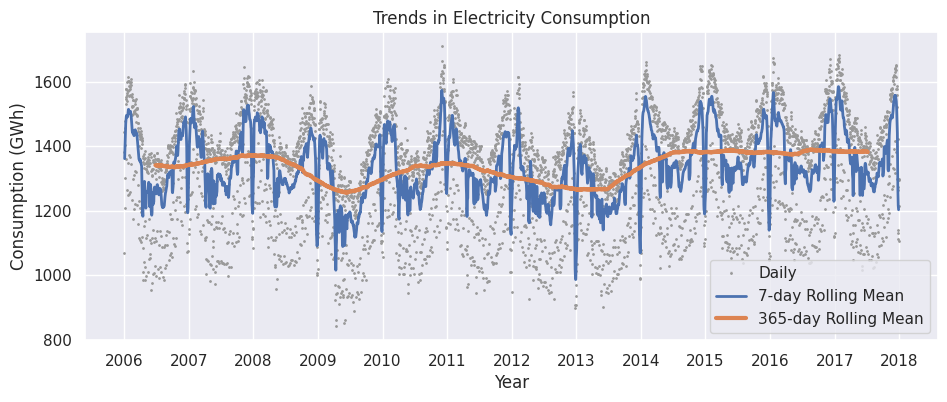

In [71]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(opsd_daily["Consumption"], marker=".", markersize=2, color="0.6", linestyle="None", label="Daily")
ax.plot(opsd_7d["Consumption"], linewidth=2, label="7-day Rolling Mean")
ax.plot(opsd_365d["Consumption"], linewidth="3", label="365-day Rolling Mean")

# Set x-ticks to yearly interval
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlabel("Year")
ax.set_ylabel("Consumption (GWh)")
ax.set_title("Trends in Electricity Consumption")
ax.legend()
plt.show()

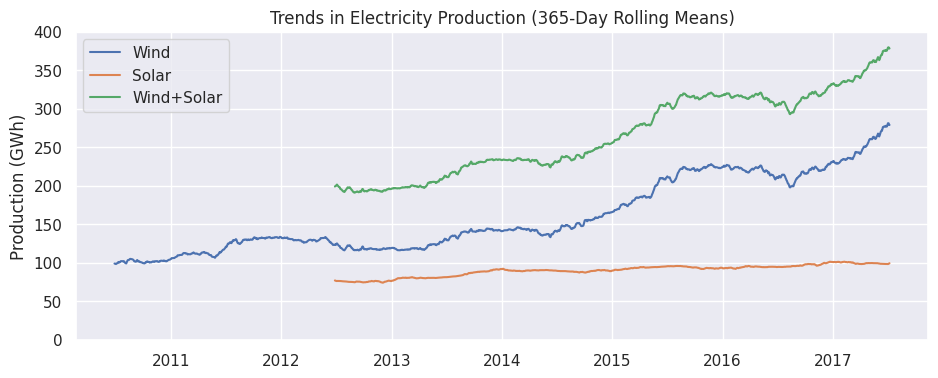

In [72]:
# Plot 365-day rolling mean time series of wind and solar power
fig, ax = plt.subplots()
for nm in ["Wind", "Solar", "Wind+Solar"]:
    ax.plot(opsd_365d[nm], label=nm)
    # Set x-ticks to yearly interval, adjust y-axis limits, add legend, and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel("Production (GWh)")
    ax.set_title("Trends in Electricity Production (365-Day Rolling Means)")
plt.show()